<a href="https://colab.research.google.com/github/lamisghoualmi/Chronic-Kidney-disease-Data-analysis-and-Prediction/blob/main/Kidney_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

****
**Objective of my work**:
Performing an exploratory data analysis and building  machine learning models.
****
**Probleme encountred**:
The data contains a lot of missing values. How to deal with this missing values? How an  imputation technique (replacing missing values by zero, constant, mean, median, most frequent value, etc.) will impact the accuracy of a machine learning model? 
****
The aim of this work is to respond to these questions.
****

**Import packages**

In [1]:
import numpy as np
import pandas  as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

**EXPLORATORY DATA ANALYSIS**

**Read the dataset, then checks columns informations and check the statiscital desritption of the continious variables**

**Metadata:**
age : age |
bp :blood pressure  |
sg : specific gravity  |
al : albumin  |
su : sugar  |
rbc : red blood cells|
pc :pus cell |
pcc : pus cell clumps |
ba : bacteria |
bgr : blood glucose random |
bu : blood urea |
sc : serum creatinine |
sod : sodium |
pot : potassium |
hemo : hemoglobin |
pcv : packed cell volume |
wc : white blood cell count |
rc : red blood cell count |
htn : hypertension |
dm : diabetes mellitus |
cad : coronary artery disease |
appet : appetite |
pe : pedal edema |
ane : anemia |
class : class.

In [50]:

df = pd.read_csv('kidney_disease.csv', index_col=0)
print(df.head())
print('Size of the dataset:',df.shape)
print('Variables informations')
df.info()
print('statiscital desritption of the continious variables')
df.describe()

#Correct var pcv wc rc that contains '?' and a ' nan '
df.replace('?',np.nan,inplace=True)
df.replace(' nan ',np.nan,inplace=True)

     age    bp     sg   al   su     rbc        pc         pcc          ba  \
id                                                                          
0   48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1    7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

      bgr  ...   pcv      wc   rc  htn   dm  cad  appet   pe  ane  \
id         ...                                                      
0   121.0  ...  44.0  7800.0  5.2  yes  yes   no   good   no   no   
1     NaN  ...  38.0  6000.0  NaN   no   no   no   good   no   no   
2   423.0  ...  31.0  7500.0  NaN   no  yes   no   poor   no  yes   
3   117.0  ...  32.0  6700.0  3.9  yes   no   no   poor  yes  yes   
4   106.0  ...  35.0  7300.0  4.6   no   no   

**Check for missing values for each variables**

In [51]:
#Remove duplicates from the dataset
df=df.drop_duplicates()
print('new df size', df.shape)
#------------------Check percentage of missing values for each variables----
for col in df.columns:
    PercentageMissing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(PercentageMissing *100)))

new df size (400, 25)
age - 2%
bp - 3%
sg - 12%
al - 12%
su - 12%
rbc - 38%
pc - 16%
pcc - 1%
ba - 1%
bgr - 11%
bu - 5%
sc - 4%
sod - 22%
pot - 22%
hemo - 13%
pcv - 18%
wc - 26%
rc - 33%
htn - 0%
dm - 0%
cad - 0%
appet - 0%
pe - 0%
ane - 0%
classification - 0%


In [52]:
pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


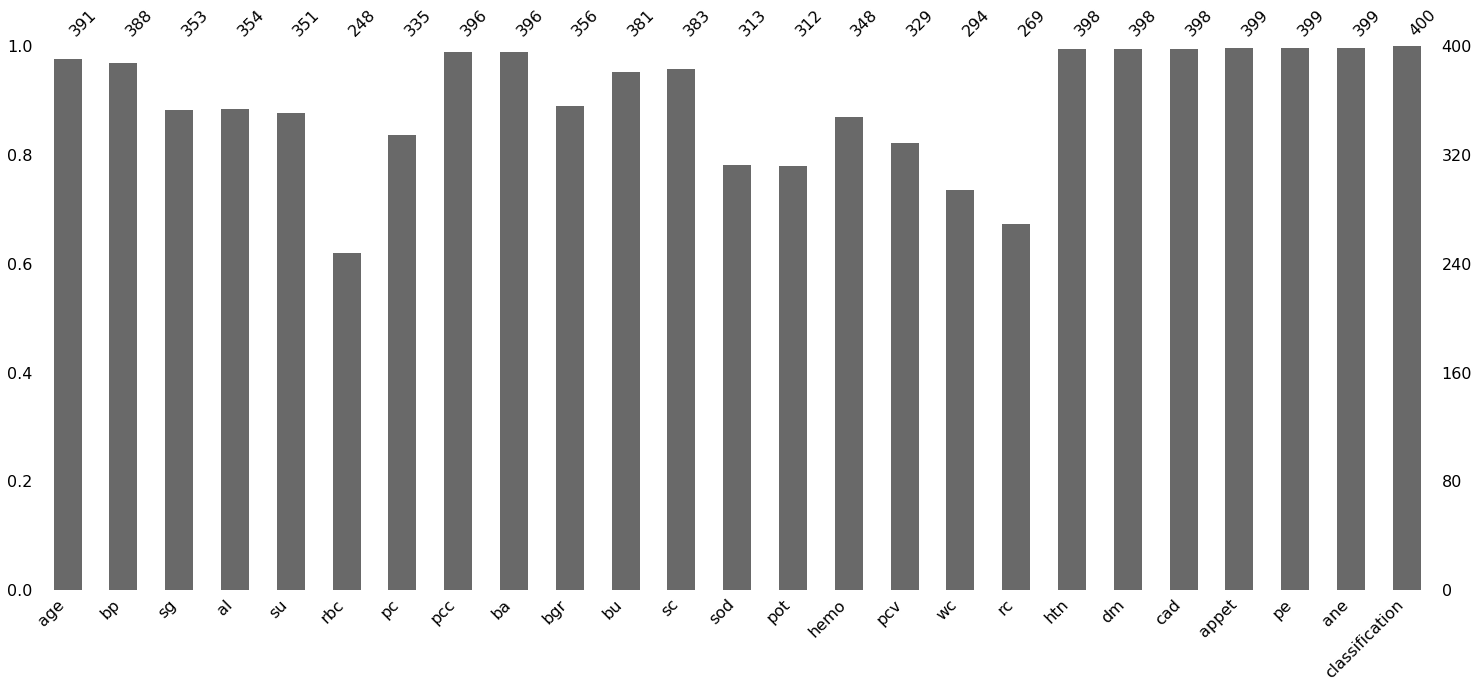

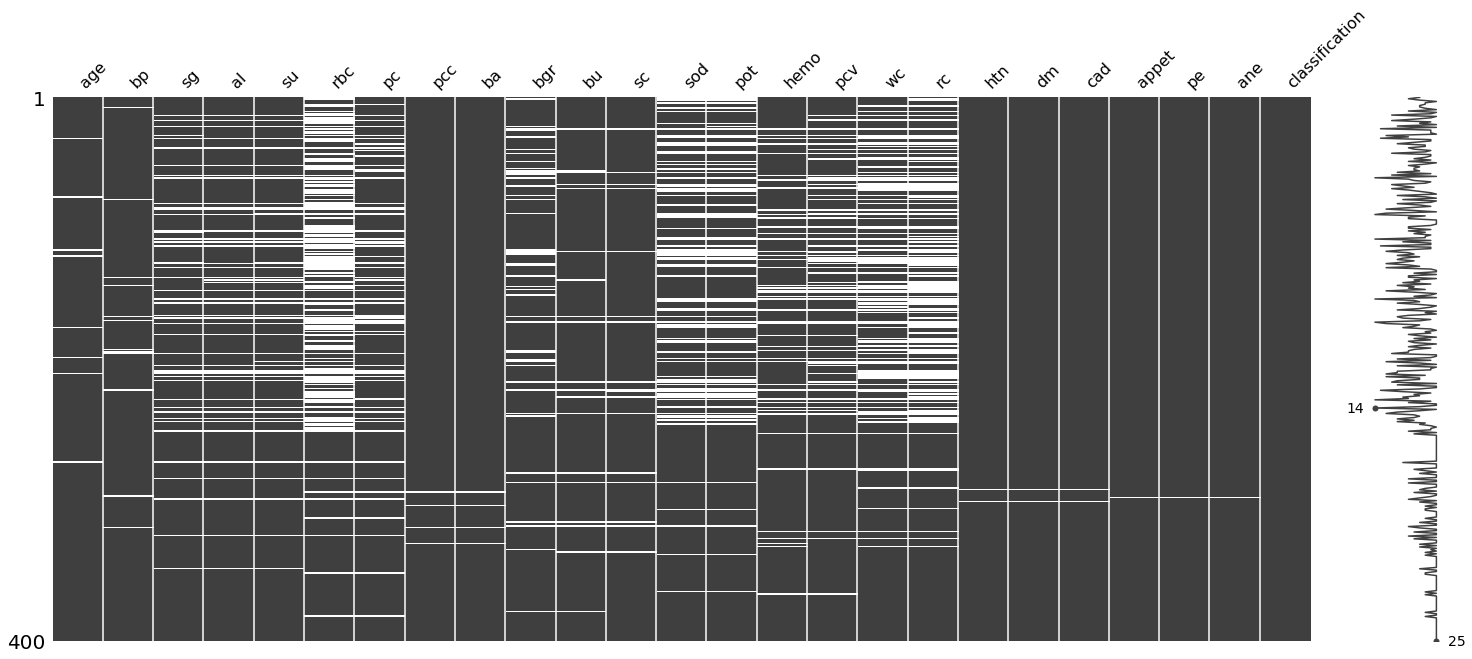

In [53]:
import missingno as  msno

msno.bar(df)
msno.matrix(df)

**Remove spaces from categoricals values** (Example 'yes' and ' yes', they are considered as two diffrent categories due to the space added in some columns values)

In [43]:
cols = df.columns
num_cols = df._get_numeric_data().columns
Categ_cols=list(set(cols) - set(num_cols))
lenght=len(Categ_cols)
for i in range (lenght):
  df[Categ_cols[i]]=df[Categ_cols[i]].str.strip()


**Statiscital descritpion and visualization of the categorical variables**

In [ ]:
cols = df.columns
num_cols = df._get_numeric_data().columns
Categ_cols=list(set(cols) - set(num_cols))
lenght=len(Categ_cols)

plt.figure(figsize = (15,30))
for i in range (lenght):
    print('____________________________________________________________________________________')
    #Variable
    print('Variable name:' ,Categ_cols[i])
    #Unique values 
    print('Unique values are:', df[Categ_cols[i]].unique())
    #Number of unique values
    print('Number of unique values:',df[Categ_cols[i]].nunique())
    # Frequencies of categorical variables
    FreqValue=df[Categ_cols[i]].value_counts()
    print('Frequency of each unique value in a catagorical variable:')
    print(FreqValue)
    #Visualization of the categoricals data
    #fig = plt.figure(figsize=(10,6))
    plt.subplot(8,3,i+1)
    #plt.title(Categ_cols[i],fontsize=15)
    ax = sns.countplot(x=df[Categ_cols[i]],  order=df[Categ_cols[i]].value_counts(ascending=False).index);

In [ ]:
pip install dabl

**An other visualization of the dataset using dabl package**

In [ ]:
import dabl
dabl.plot(df,target_col='classification')

**Data preparation, mapping and cleanning**

In [44]:
# ----------------------------------MAPPING------------------------
df.replace("yes",1,inplace=True)
df.replace("no",0,inplace=True)

df.replace('notpresent',0, inplace=True)
df.replace('present',1,inplace=True)

df.replace('normal',0,inplace=True)
df.replace('abnormal',1, inplace=True)

df.replace('good',0,inplace=True)
df.replace('poor',1, inplace=True)

df.replace('notckd',0, inplace=True)
df.replace('ckd', 1, inplace=True)
df.replace('ckd\t' , 1, inplace=True)



**Imputing techniques for handling missing values for numerical and categorical data**

In [45]:
# Technique 1 removing all observations with missing values
#df = df.dropna()

#Technique 2
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

#Technique 3
#df = df.fillna(df.median())
df.shape

(400, 25)

**Correlations**

In [ ]:
print(df.columns)
import plotly
import plotly.express as px
fig = px.imshow(df.corr(),color_continuous_scale="Blues")
fig.show()

**Prepare data,  target, training and testing data**

In [46]:

target=df['classification']
df=df.drop(['classification'], axis=1)


In [47]:
from sklearn import metrics
# ------------------------Prepare the data training and test-------------------
X_train,X_test,y_train,y_test = train_test_split(df,target,test_size=.5,random_state=4)
# ------------------------logistic regression-------------------
LogRegModel=LogisticRegression()
LogRegModel.fit(X_train, y_train)
y_pred_LogReg= LogRegModel.predict(X_test)

# predict probabilities
y_pred_probaLogReg = LogRegModel.predict_proba(X_test)[::,1]

# calculate false postive and true positive rates
fprLogReg, tprLogReg, _ = metrics.roc_curve(y_test,  y_pred_probaLogReg)

Accuracy_LogReg=accuracy_score(y_test, y_pred_LogReg)
print('accuracy Logistic regression:', Accuracy_LogReg*100)

print ("MSE    :",mean_squared_error(y_test, y_pred_LogReg)*100)


# ------------------------Decision Tree-------------------
DecTree= DecisionTreeClassifier()
DecTree.fit(X_train, y_train)
y_pred_DecTree= DecTree.predict(X_test)

# predict probabilities
y_pred_probaDecTree = DecTree.predict_proba(X_test)[::,1]
# calculate false postive and true positive rates
fprDecTree, tprDecTree, _ = metrics.roc_curve(y_test,  y_pred_probaDecTree)

Accuracy_DecTree=accuracy_score(y_test, y_pred_DecTree)
print('accuracy Decision tree:', Accuracy_DecTree*100)
print ("MSE    :",mean_squared_error(y_test, y_pred_DecTree)*100)

# ------------------------Random forest------------------
RandForest = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
RandForest.fit(X_train, y_train)
y_pred_RandForest= RandForest.predict(X_test)

# predict probabilities
y_pred_probaRandForest = RandForest.predict_proba(X_test)[::,1]
# calculate false postive and true positive rates
fprRandForest, tprRandForest, _ = metrics.roc_curve(y_test,  y_pred_probaRandForest)

Accuracy_RandForest=accuracy_score(y_test, y_pred_RandForest)
print('Random forest:', Accuracy_RandForest*100)
print ("MSE    :",mean_squared_error(y_test, y_pred_RandForest)*100)
# ------------------------KnnC------------------
from sklearn.neighbors import KNeighborsClassifier
KNNc = KNeighborsClassifier(n_neighbors=3)
KNNc.fit(X_train, y_train)
y_pred_KNNc= KNNc.predict(X_test)

# predict probabilities
y_pred_probaKNNc = KNNc.predict_proba(X_test)[::,1]
# calculate false postive and true positive rates
fprKNNc, tprKNNc, _ = metrics.roc_curve(y_test,  y_pred_probaKNNc)

Accuracy_KNNc=accuracy_score(y_test, y_pred_KNNc)
print('KNNc:', Accuracy_KNNc*100)
print ("MSE    :",mean_squared_error(y_test, y_pred_KNNc)*100)




accuracy Logistic regression: 88.5
MSE    : 11.5
accuracy Decision tree: 95.0
MSE    : 5.0
Random forest: 100.0
MSE    : 0.0
KNNc: 72.5
MSE    : 27.500000000000004


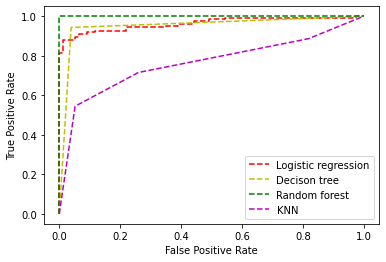

In [48]:
plt.plot(fprLogReg,tprLogReg, 'r--', fprDecTree, tprDecTree, 'y--', 
         fprRandForest, tprRandForest, 'g--',  fprKNNc, tprKNNc, 'm--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.gca().legend(('Logistic regression','Decison tree', 'Random forest', 'KNN'))
plt.show()